In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# # 압축 해제하는 명령어
# !unzip /content/drive/MyDrive/busanit501-1234/train.zip -d /content/drive/MyDrive/busanit501-1234/class/


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# ✅ 데이터 경로 설정
data_dir = "./training_set"

# 데이터 변환 (이미지 크기 조정, 정규화)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # VGG 스타일 크기
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ResNet 정규화 값
])

# 데이터셋 로드
train_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 클래스 목록 확인
class_names = train_dataset.classes
num_classes = len(class_names)
print(f"✅ 클래스 목록: {class_names}")


✅ 클래스 목록: ['cats', 'dogs']


In [13]:
# from google.colab import drive
import os


# 데이터 폴더 경로 설정
data_dir = "./training_set/"

# 폴더 안에 있는 클래스 확인
print("🔍 데이터셋 폴더 내 클래스 확인:")
print(os.listdir(data_dir))


🔍 데이터셋 폴더 내 클래스 확인:
['dogs', 'cats', '.DS_Store']


In [14]:
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# ✅ ResNet-50 모델 불러오기 (사전 학습된 모델 사용)
model = models.resnet50(pretrained=True)

# ✅ 마지막 Fully Connected Layer 변경 (기존 1000 → 데이터셋 클래스 개수)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# ✅ 모델을 GPU로 이동 (가능한 경우)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 최적화 함수 및 손실 함수
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


/opt/anaconda3/envs/Pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/Pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
num_epochs = 10  # 학습 횟수
print("🚀 모델 학습 시작...")
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # 1번마다 손실값 출력
        if (i + 1) % 1 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}")
            running_loss = 0.0


🚀 모델 학습 시작...
Epoch [1/10], Step [1/251], Loss: 0.0071
Epoch [1/10], Step [2/251], Loss: 0.0039
Epoch [1/10], Step [3/251], Loss: 0.0034
Epoch [1/10], Step [4/251], Loss: 0.0030
Epoch [1/10], Step [5/251], Loss: 0.0042
Epoch [1/10], Step [6/251], Loss: 0.0105
Epoch [1/10], Step [7/251], Loss: 0.0034
Epoch [1/10], Step [8/251], Loss: 0.0037
Epoch [1/10], Step [9/251], Loss: 0.0076
Epoch [1/10], Step [10/251], Loss: 0.0096
Epoch [1/10], Step [11/251], Loss: 0.0069
Epoch [1/10], Step [12/251], Loss: 0.0090
Epoch [1/10], Step [13/251], Loss: 0.0136
Epoch [1/10], Step [14/251], Loss: 0.0115
Epoch [1/10], Step [15/251], Loss: 0.0044
Epoch [1/10], Step [16/251], Loss: 0.0104
Epoch [1/10], Step [17/251], Loss: 0.0069
Epoch [1/10], Step [18/251], Loss: 0.0055
Epoch [1/10], Step [19/251], Loss: 0.0058
Epoch [1/10], Step [20/251], Loss: 0.0052
Epoch [1/10], Step [21/251], Loss: 0.0052
Epoch [1/10], Step [22/251], Loss: 0.0047
Epoch [1/10], Step [23/251], Loss: 0.0058
Epoch [1/10], Step [24/251], 

KeyboardInterrupt: 

In [16]:
model_path = "./resnet50_model2.pth"
torch.save(model.state_dict(), model_path)
print(f"✅ 학습된 모델이 저장되었습니다: {model_path}")


✅ 학습된 모델이 저장되었습니다: ./resnet50_model2.pth


In [9]:
def load_model(model_path, num_classes):
    model = models.resnet50(pretrained=False)  # 새 모델 생성
    model.fc = nn.Linear(model.fc.in_features, num_classes)  # Fully Connected Layer 맞춤 설정
    model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))  # CPU에서 로드
    model.eval()  # 평가 모드로 설정
    return model

# ✅ 모델 불러오기
loaded_model = load_model(model_path, num_classes)
print("✅ 모델이 성공적으로 불러와졌습니다!")

/opt/anaconda3/envs/Pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


✅ 모델이 성공적으로 불러와졌습니다!


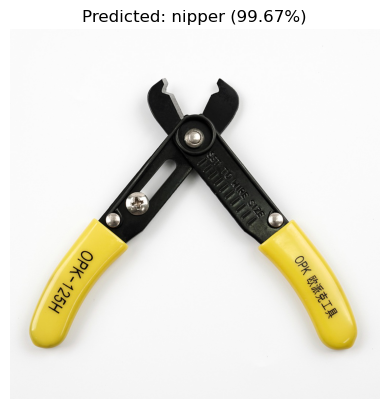

🔍 예측된 클래스: nipper
📊 정확도: 99.67%


In [11]:
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F

def predict_sample(image_path, model, class_names):
    """
       저장된 ResNet-50 모델을 사용하여 샘플 이미지를 예측하는 함수.
    """
    # 이미지 불러오기 및 전처리
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ResNet 정규화 값
    ])
    image = transform(image).unsqueeze(0)  # 배치 차원 추가 (1, 3, 224, 224)

    # 모델 예측
    with torch.no_grad():
      output = model(image)
      probabilities = F.softmax(output[0], dim=0)  # Softmax 적용
      predicted_idx = torch.argmax(probabilities).item()
      confidence = probabilities[predicted_idx].item()

    # ✅ 결과 출력
    plt.imshow(Image.open(image_path))
    plt.title(f"Predicted: {class_names[predicted_idx]} ({confidence * 100:.2f}%)")
    plt.axis('off')
    plt.show()

    print(f"🔍 예측된 클래스: {class_names[predicted_idx]}")
    print(f"📊 정확도: {confidence * 100:.2f}%")

# 🏆 샘플 이미지 경로 입력하여 예측 실행
sample_image = "./sample.png"
predict_sample(sample_image, loaded_model, class_names)
